In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_pickle('treino.pkl.gz')

In [28]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [29]:
# tratando variável 'nascimento', a fim de transformá-la na variável idade

In [30]:
df['nascimento'].isnull().value_counts()

False    186523
Name: nascimento, dtype: int64

In [31]:
# possíveis anos de nascimento
# suponho que todos sejam '19--', com exceção de '1900', neste caso, considero que o ano seja '2000'
df['nascimento'].str[6:].unique()

array(['76', '97', '83', '94', '92', '80', '79', '95', '96', '72', '73',
       '71', '88', '84', '61', '70', '75', '85', '69', '77', '67', '82',
       '74', '89', '63', '64', '87', '65', '91', '81', '90', '78', '86',
       '93', '99', '68', '62', '98', '55', '58', '59', '66', '00', '60',
       '56', '54', '57', '49'], dtype=object)

In [32]:
def year_to_age(x):
    if x == '00':
        return 20
    else:
        return (100 - int(x)) + 20

df['nascimento'] = df['nascimento'].str[6:].apply(lambda x: year_to_age(x))
df = df.rename(columns = {'nascimento': 'idade'})

In [33]:
# categorizando variável 'idade'
# por meio de thresholds que discriminam percentis

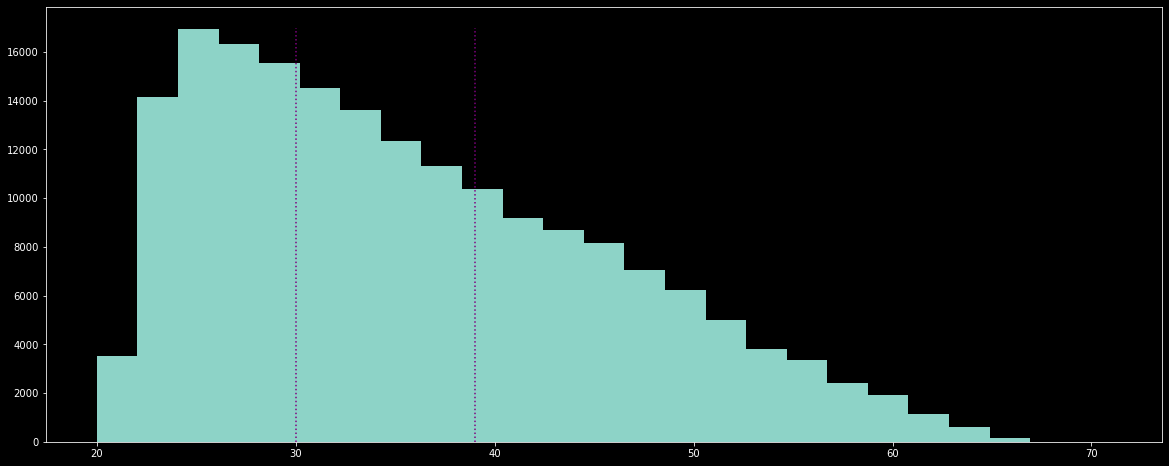

In [34]:
frst = np.quantile(df['idade'], 0.33)
scnd = np.quantile(df['idade'], 0.66)
plt.hist(df['idade'], bins = 25)
plt.plot([frst, frst], [0, 17000], ls = ':', color = 'purple')
plt.plot([scnd, scnd], [0, 17000], ls = ':', color = 'purple')
plt.show()

In [35]:
def categ_age(x, thrshld_1, thrshld_2):
    
    if x < thrshld_1:
        return 'low'
    
    elif x >= thrshld_1 and x <= thrshld_2:
        return 'medium'
    
    elif x > thrshld_2:
        return 'high'
    
df['idade'] = df['idade'].apply(lambda x: categ_age(x, frst, scnd))

In [38]:
low_age = df.loc[df['idade'] == 'low']
medium_age = df.loc[df['idade'] == 'medium']
high_age = df.loc[df['idade'] == 'high']

In [69]:
# distribuição dos dados entre as categorias criadas por percentil

print('dados no grupo de low_age:', len(low_age))
print('       //      medium_age:', len(medium_age))
print('       //        high_age:', len(high_age))
print('')
print('proporção de dados no grupo low_age:', round(len(low_age) / len(df) * 100, 2), '%')
print('            //           medium_age:', round(len(medium_age) / len(df) * 100, 2), '%')
print('            //             high_age:', round(len(high_age) / len(df) * 100, 2), '%')
print('')
print('proporção de "default" no grupo low_age:',
      round(low_age['default'].value_counts(1).iloc[1] * 100, 2), '%')
print('              //             medium_age:', round(medium_age['default'].value_counts(1).iloc[1] * 100, 2),
      '%')
print('              //               high_age:', round(high_age['default'].value_counts(1).iloc[1] * 100, 2), 
      '%')

# a incidência de 'default' é mais frequente am grupos mais jovens

dados no grupo de low_age: 58459
       //      medium_age: 64835
       //        high_age: 63229

proporção de dados no grupo low_age: 31.34 %
            //           medium_age: 34.76 %
            //             high_age: 33.9 %

proporção de "default" no grupo low_age: 23.5 %
              //             medium_age: 21.47 %
              //               high_age: 20.1 %


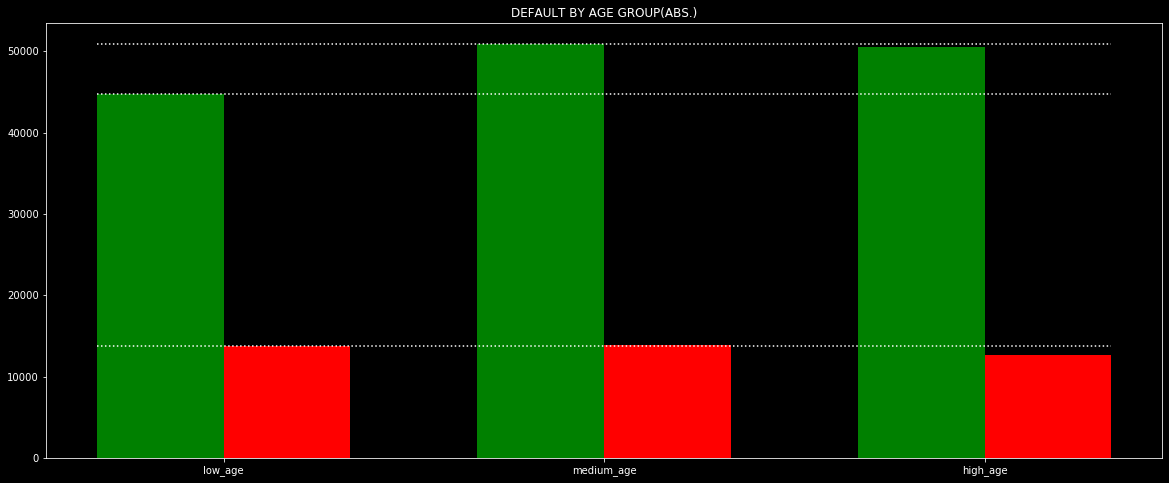

In [90]:
plt.bar([0], [len(low_age.loc[low_age['default'] == 0])], width = 0.5, color = 'green')
plt.bar([0.5], [len(low_age.loc[low_age['default'] == 1])], width = 0.5, color = 'red')

plt.bar([1.5], [len(medium_age.loc[medium_age['default'] == 0])], width = 0.5, color = 'green')
plt.bar([2], [len(medium_age.loc[medium_age['default'] == 1])], width = 0.5, color = 'red')

plt.bar([3], [len(high_age.loc[high_age['default'] == 0])], width = 0.5, color = 'green')
plt.bar([3.5], [len(high_age.loc[high_age['default'] == 1])], width = 0.5, color = 'red')

plt.plot([-0.25, 3.75], [len(low_age.loc[low_age['default'] == 1]),
                         len(low_age.loc[low_age['default'] == 1])], ls = ':', color = 'white')

plt.plot([-0.25, 3.75], [len(low_age.loc[low_age['default'] == 0]),
                         len(low_age.loc[low_age['default'] == 0])], ls = ':', color = 'white')

plt.plot([-0.25, 3.75], [len(medium_age.loc[medium_age['default'] == 0]),
                         len(medium_age.loc[medium_age['default'] == 0])], ls = ':', color = 'white')

plt.xticks([0.25, 1.75, 3.25], ['low_age', 'medium_age', 'high_age'])
plt.title('DEFAULT BY AGE GROUP(ABS.)')

plt.show()

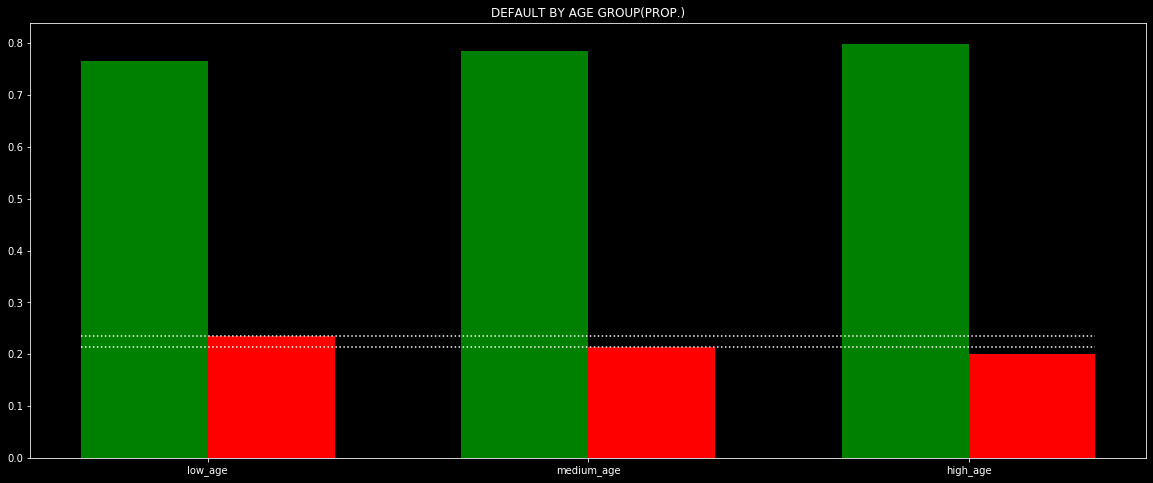

In [107]:
low_age['default'].value_counts(1).iloc[1]
medium_age['default'].value_counts(1).iloc[1]
high_age['default'].value_counts(1).iloc[1]

plt.bar([0], [low_age['default'].value_counts(1).iloc[0]], width = 0.5, color = 'green')
plt.bar([0.5], [low_age['default'].value_counts(1).iloc[1]], width = 0.5, color = 'red')

plt.bar([1.5], [medium_age['default'].value_counts(1).iloc[0]], width = 0.5, color = 'green')
plt.bar([2], [medium_age['default'].value_counts(1).iloc[1]], width = 0.5, color = 'red')

plt.bar([3], [high_age['default'].value_counts(1).iloc[0]], width = 0.5, color = 'green')
plt.bar([3.5], [high_age['default'].value_counts(1).iloc[1]], width = 0.5, color = 'red')

plt.plot([-0.25, 3.75], [low_age['default'].value_counts(1).iloc[1],
                         low_age['default'].value_counts(1).iloc[1]], ls = ':', color = 'white')

plt.plot([-0.25, 3.75], [medium_age['default'].value_counts(1).iloc[1],
                         medium_age['default'].value_counts(1).iloc[1]], ls = ':', color = 'white')

plt.xticks([0.25, 1.75, 3.25], ['low_age', 'medium_age', 'high_age'])
plt.title('DEFAULT BY AGE GROUP(PROP.)')

plt.show()

In [111]:
est, p, dof, exp = chi2_contingency(pd.crosstab(df['idade'], df['default']))
crit = chi2.ppf(q = 0.9999999999, df = dof)
print('estatística qui-quadrada do teste:', round(est, 2))
print('valor crítico:', round(crit, 2))

estatística qui-quadrada do teste: 208.47
valor crítico: 46.05
